In [129]:
import pandas as pd
from datetime import datetime, date, timedelta
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from collections import Counter
from IPython.display import display, HTML
import time
import random
from scipy import stats
from statistics import mode
import seaborn as sns
import sklearn.cluster as cluster

In [3]:
df = pd.read_csv(r'/Users/navidabasi/Desktop/bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


## 1.1 Set up the data


#### Removing unnesecarry columns 

TransactionDate and TransactionTime 

In [4]:
columns = ['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerDOB','CustGender','TransactionDate','TransactionTime']

df = df[columns]
df

,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerDOB,CustGender,TransactionDate,TransactionTime
0,JAMSHEDPUR,17819.05,25.0,10/1/94,F,2/8/16,143207
1,JHAJJAR,2270.69,27999.0,4/4/57,M,2/8/16,141858
2,MUMBAI,17874.44,459.0,26/11/96,F,2/8/16,142712
3,MUMBAI,866503.21,2060.0,14/9/73,F,2/8/16,142714
4,NAVI MUMBAI,6714.43,1762.5,24/3/88,F,2/8/16,181156
...,...,...,...,...,...,...,...
1048562,NEW DELHI,7635.19,799.0,8/4/90,M,18/9/16,184824
1048563,NASHIK,27311.42,460.0,20/2/92,M,18/9/16,183734
1048564,HYDERABAD,221757.06,770.0,18/5/89,M,18/9/16,183313
1048565,VISAKHAPATNAM,10117.87,1000.0,30/8/78,M,18/9/16,184706


In [5]:
df = df.dropna()

In [6]:
df.TransactionDate = pd.to_datetime(df.TransactionDate)

/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_7050/1862356541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TransactionDate = pd.to_datetime(df.TransactionDate)


In [7]:
df

,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerDOB,CustGender,TransactionDate,TransactionTime
0,JAMSHEDPUR,17819.05,25.0,10/1/94,F,2016-02-08,143207
1,JHAJJAR,2270.69,27999.0,4/4/57,M,2016-02-08,141858
2,MUMBAI,17874.44,459.0,26/11/96,F,2016-02-08,142712
3,MUMBAI,866503.21,2060.0,14/9/73,F,2016-02-08,142714
4,NAVI MUMBAI,6714.43,1762.5,24/3/88,F,2016-02-08,181156
...,...,...,...,...,...,...,...
1048562,NEW DELHI,7635.19,799.0,8/4/90,M,2016-09-18,184824
1048563,NASHIK,27311.42,460.0,20/2/92,M,2016-09-18,183734
1048564,HYDERABAD,221757.06,770.0,18/5/89,M,2016-09-18,183313
1048565,VISAKHAPATNAM,10117.87,1000.0,30/8/78,M,2016-09-18,184706


In [8]:
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
df

/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_7050/2080729413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])


,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerDOB,CustGender,TransactionDate,TransactionTime
0,JAMSHEDPUR,17819.05,25.0,1994-10-01,F,2016-02-08,143207
1,JHAJJAR,2270.69,27999.0,2057-04-04,M,2016-02-08,141858
2,MUMBAI,17874.44,459.0,1996-11-26,F,2016-02-08,142712
3,MUMBAI,866503.21,2060.0,1973-09-14,F,2016-02-08,142714
4,NAVI MUMBAI,6714.43,1762.5,1988-03-24,F,2016-02-08,181156
...,...,...,...,...,...,...,...
1048562,NEW DELHI,7635.19,799.0,1990-08-04,M,2016-09-18,184824
1048563,NASHIK,27311.42,460.0,1992-02-20,M,2016-09-18,183734
1048564,HYDERABAD,221757.06,770.0,1989-05-18,M,2016-09-18,183313
1048565,VISAKHAPATNAM,10117.87,1000.0,1978-08-30,M,2016-09-18,184706


In [9]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

#### Removing ineffiecinet data

In [10]:
df['TransactionTime'] = df.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))
df['TransactionTime'] = df.TransactionTime.dt.time


/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_7050/1323890950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionTime'] = df.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))
/var/folders/sw/nckv58zd65vctfdplt96f_7m0000gn/T/ipykernel_7050/1323890950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionTime'] = df.TransactionTime.dt.time


In [11]:
df

,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerDOB,CustGender,TransactionDate,TransactionTime
0,JAMSHEDPUR,17819.05,25.0,1994-10-01,F,2016-02-08,14:32:07
1,JHAJJAR,2270.69,27999.0,2057-04-04,M,2016-02-08,14:18:58
2,MUMBAI,17874.44,459.0,1996-11-26,F,2016-02-08,14:27:12
3,MUMBAI,866503.21,2060.0,1973-09-14,F,2016-02-08,14:27:14
4,NAVI MUMBAI,6714.43,1762.5,1988-03-24,F,2016-02-08,18:11:56
...,...,...,...,...,...,...,...
1048562,NEW DELHI,7635.19,799.0,1990-08-04,M,2016-09-18,18:48:24
1048563,NASHIK,27311.42,460.0,1992-02-20,M,2016-09-18,18:37:34
1048564,HYDERABAD,221757.06,770.0,1989-05-18,M,2016-09-18,18:33:13
1048565,VISAKHAPATNAM,10117.87,1000.0,1978-08-30,M,2016-09-18,18:47:06


In [ ]:
# Using pd.get_dummies pretty much computes the characteristic matrix for us.

CustLocation = pd.get_dummies(df['CustLocation'], sparse=True)

CustAccountBalance = pd.get_dummies(df['CustAccountBalance'].astype(int), prefix='B', sparse=True)
TransactionAmount = pd.get_dummies(df['TransactionAmount (INR)'].astype(int), prefix='A', sparse=True)

CustomerDOB = pd.get_dummies(df['CustomerDOB'].dt.year.astype(int), prefix='YOB', sparse=True)

CustGender = pd.get_dummies(df['CustGender'], prefix='G')

TransactionDate = pd.get_dummies(df['TransactionDate'].dt.month.astype(int), prefix='TRANS_M')

TransactionTime = pd.get_dummies(df['TransactionTime'].apply(lambda row: row.hour).astype(int), prefix='TRANS_H')

print("See the characteristic matrix for the CustomerDOB as an expample:")
CustomerDOB

## Making the Main Characteristic Matrix

In [ ]:
M = pd.concat([CustomerDOB, CustGender, CustAccountBalance, CustLocation], axis=1).sample(frac=1, axis=1)

In [ ]:
M

## 1.2 Fingerprint hashing


##### Implementing Custom MinHash function

In [ ]:
def randomHashing(x,n,p = 85411):
    
    '''
    Where x is the hash variable, n is the number of hash functions to use and
    p is the number of columns in main characterestic matrix (M)
    '''
    
    random.seed(0) #Using seed to be able to reproduce same results each time we run this function

    H = [] #Hashed values
    
    for i in range(n):
        a = random.randint(1, n*2) # Random int to generate hash values
        H.append((lambda x: ((x * a) % p))(i))
    return H

In [ ]:
randomHashing(df.CustLocation, 10) #Hashing only 10 values

To approximate the Jaccard Similarity between two sets, we will take their MinHash signatures, and simply count the number of components which are equal. If you divide this count by the signature length, you have a pretty good approximation to the Jaccard Similarity between those two sets.

In [ ]:
def Sig(m,n,M):
    #M in this function acts as a dataframe
    #n is the number of hash functions to use
    #m is the number of shingles to consider
    
        
    sig = np.matrix(np.ones((n, len(M))) * np.inf)
    
    A = []
    M = M[M.columns[:m]]
    
    for i, r in enumerate(M.columns): #iterate over shingles
        H, random_factors = randomHashing(i+1 , n) #Passing to generate random values for signature matrix rows
        A.append(random_facotrs)
        
        nonzero = np.where(M[r] == 1) #Indices of columns that have shingle r
        
        for idx in range(n):
            sig[idx,nonzero] = np.minimum(sig[idx, nonzero], H[idx]) #Finding fingerprints
            
    return sig

## 1.3 Locality Sensitive Hashing


In [ ]:
query_data = pd.read_csv(r'/Users/navidabasi/Desktop/query_users.csv')

In [ ]:
query_data.head()

In [ ]:
#Changing formats to match our dataset

query_data['CustomerDOB'] = pd.to_datetime(query_data.CustomerDOB)
query_data['TransactionDate'] = pd.to_datetime(query_data.TransactionDate)
query_data['TransactionTime'] = query_data.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))
query_data['TransactionTime'] = query_data.TransactionTime.dt.time

query_db = query_data[columns]

In [ ]:
query_db

As we once tried it before we have to make a matrix for the query with pandas get_dummies 

In [ ]:
def M_query(query_data):
    M_query = []
        
    q_CustLocation = pd.get_dummies(query_data['CustLocation'])

    q_CustAccountBalance = pd.get_dummies(query_data['CustAccountBalance'])
    q_TransactionAmount = pd.get_dummies(query_data['TransactionAmount (INR)']).astype(int)

    q_CustomerDOB = pd.get_dummies(query_data['CustomerDOB'].dt.year.astype(int), prefix='DOB')

    q_CustGender = pd.get_dummies(query_data['CustGender'], prefix='Gender')


    q_TransactionDate = pd.get_dummies(query_data['TransactionDate'].dt.month.astype(int), prefix='TRANS_M')

    q_TransactionTime = pd.get_dummies(query_data['TransactionTime'].apply(lambda row: row.hour)).astype(int)



    Q = pd.concat([q_CustLocation, q_CustAccountBalance, q_TransactionAmount, q_CustomerDOB, q_CustGender, q_TransactionDate, q_TransactionTime])

    M_query.append(Q)
        
    return M_query
        

In [64]:
M_query(query_db)

[    AHMEDABAD  AURANGABAD  BANGALORE  CHENNAI  CHITTOOR  DELHI  \
 0         0.0         0.0        0.0      0.0       0.0    1.0   
 1         0.0         0.0        0.0      0.0       0.0    0.0   
 2         0.0         0.0        0.0      0.0       0.0    0.0   
 3         0.0         0.0        0.0      1.0       0.0    0.0   
 4         0.0         0.0        0.0      0.0       0.0    0.0   
 ..        ...         ...        ...      ...       ...    ...   
 45        NaN         NaN        NaN      NaN       NaN    NaN   
 46        NaN         NaN        NaN      NaN       NaN    NaN   
 47        NaN         NaN        NaN      NaN       NaN    NaN   
 48        NaN         NaN        NaN      NaN       NaN    NaN   
 49        NaN         NaN        NaN      NaN       NaN    NaN   
 
     DIST NORTH GOA BARDEZ  GHAZIABAD  GURGAON  HODEL  ...   13   14   15   16  \
 0                     0.0        0.0      0.0    0.0  ...  NaN  NaN  NaN  NaN   
 1                     0.0    

# 2. Grouping customers together!


In [ ]:
df = pd.read_csv(r'/Users/navidabasi/Desktop/bank_transactions.csv')
df = df.dropna()

df.TransactionDate = pd.to_datetime(df.TransactionDate)
df['TransactionTime'] = df.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))
df['TransactionTime'] = df.TransactionTime.dt.time


In [43]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
groupedCust = df.groupby(by='CustomerID')

We can use .apply(display) to show the groups but since it need too much resources and ram I skipped this step

#### a) Number of transactions

In [41]:
groupedCust.TransactionID.count().sort_values()

CustomerID
C5030890    1
C6138083    1
C6138089    1
C6138091    1
C6138092    1
           ..
C1736254    6
C5533885    6
C4513786    6
C4327447    6
C4021562    6
Name: TransactionID, Length: 879358, dtype: int64

<AxesSubplot:ylabel='Frequency'>

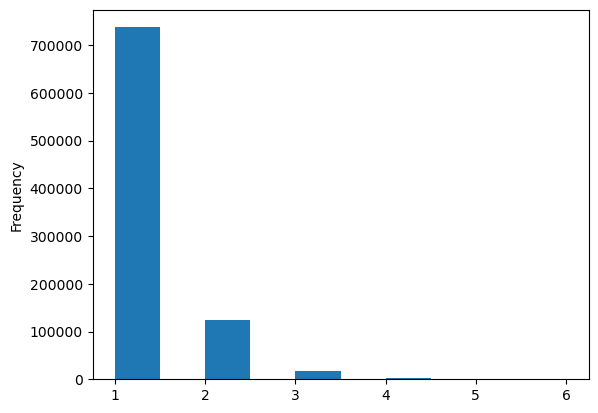

In [42]:
groupedCust.TransactionID.count().plot.hist()

#### b) Number of transactions with a balance bigger than 100 USD

In [52]:
df.loc[df['TransactionAmount (INR)'] > 100, 'TransactionAmount (INR)'].astype(int)


1          27999
2            459
3           2060
4           1762
5            676
           ...  
1048562      799
1048563      460
1048564      770
1048565     1000
1048566     1166
Name: TransactionAmount (INR), Length: 842794, dtype: int64

#### c) Average amount of the transactions

In [58]:
df.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'},
          inplace=True, errors='raise')

In [64]:
groupedCust.TransactionAmount.mean()

CustomerID
C1010011    2553.0
C1010012    1499.0
C1010014     727.5
C1010018      30.0
C1010024    5000.0
             ...  
C9099836     691.0
C9099877     222.0
C9099919     126.0
C9099941      50.0
C9099956     855.0
Name: TransactionAmount, Length: 879358, dtype: float64

#### d) Average balance

In [63]:
groupedCust.CustAccountBalance.mean()

CustomerID
C1010011     76340.635
C1010012     24204.490
C1010014    100112.950
C1010018       496.180
C1010024     87058.650
               ...    
C9099836    133067.230
C9099877     96063.460
C9099919      5559.750
C9099941     35295.920
C9099956      6968.930
Name: CustAccountBalance, Length: 879358, dtype: float64

#### e) Average difference between the balance and the transaction amount for each customer (this is mainly known in the banking world as utilisation).



In [65]:
df['Utilisation'] = df['CustAccountBalance'] - df['TransactionAmount']

In [66]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Utilisation
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,17794.05
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,-25728.31
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,17415.44
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,864443.21
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,4951.93
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,6836.19
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,26851.42
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,220987.06
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,9117.87


#### f) Most common gender of the customer



In [91]:
CustGender = pd.get_dummies(df['CustGender'])
CustGender.mean()

F    2.694232e-01
M    7.305758e-01
T    9.600485e-07
dtype: float64

#### h) Most frequent location of the customer



In [95]:
CustLocation = pd.get_dummies(df['CustLocation'])
CustLocation.mean()

(154) BHASKOLA FARIDABAD          1.056053e-05
(BEFORE YMCA BLDG) CHENNAI        9.600485e-07
(BENAKA MDTS) BANGALORE           2.016102e-05
(BRINDA BAN ) KOLKATA             4.800243e-06
(DT) HOSUR                        1.056053e-05
                                      ...     
ZONE WHITEFIELD BANGALORE         3.936199e-05
ZOPADPATTI TEHSIL KURLA MUMBAI    9.600485e-07
ZUARINAGAR                        5.760291e-06
ZUMARI TILAIYA                    8.640437e-06
ZUNHEBOTO                         9.600485e-07
Length: 9275, dtype: float64

In [97]:
max(CustLocation)

'ZUNHEBOTO'

#### 20 Features

#### 1.Maximum Transaction Amount


In [137]:
df["MaximumTransactionAmount"]=df.agg({"TransactionAmount": lambda x:np.max(x)})#{"Transaction#":lambda x: len(x)} )

#### 2.Minimum Transaction Amount

The Above checks if the type of values in transactionDate column is Timestamp and if not takes the smallest value

In [139]:
df['MinimumTransactionAmount'] = df.agg({'TransactionAmount': lambda x: np.min(x)})


In [140]:
df

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Utilisation,NumericCustGender,MaximumTransactionAmount,MinimumTransactionAmount
0,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,17794.05,0.0,25.0,25.0
1,4/4/57,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,-25728.31,1.0,27999.0,27999.0
2,26/11/96,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,17415.44,0.0,459.0,459.0
3,14/9/73,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,864443.21,0.0,2060.0,2060.0
4,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,4951.93,0.0,1762.5,1762.5
...,...,...,...,...,...,...,...,...,...,...,...
1048562,8/4/90,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,6836.19,1.0,799.0,799.0
1048563,20/2/92,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,26851.42,1.0,460.0,460.0
1048564,18/5/89,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,220987.06,1.0,770.0,770.0
1048565,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,9117.87,1.0,1000.0,1000.0


Min/Max Transaction Amount will be same for Customers that only have 1 Transaction Record in the dataset

#### 3.First Transaction

In [148]:
df['First_Trnasaction'] = df['TransactionDate'].map(lambda x: x if type(x) == pd.Timestamp else x.min())

In [149]:
df

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Utilisation,NumericCustGender,MaximumTransactionAmount,MinimumTransactionAmount,First_Trnasaction
0,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,17794.05,0.0,25.0,25.0,2016-02-08
1,4/4/57,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,-25728.31,1.0,27999.0,27999.0,2016-02-08
2,26/11/96,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,17415.44,0.0,459.0,459.0,2016-02-08
3,14/9/73,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,864443.21,0.0,2060.0,2060.0,2016-02-08
4,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,4951.93,0.0,1762.5,1762.5,2016-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,8/4/90,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,6836.19,1.0,799.0,799.0,2016-09-18
1048563,20/2/92,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,26851.42,1.0,460.0,460.0,2016-09-18
1048564,18/5/89,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,220987.06,1.0,770.0,770.0,2016-09-18
1048565,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,9117.87,1.0,1000.0,1000.0,2016-09-18


#### 4.Last Transaction

In [150]:
df['Last_Transaction'] = df['TransactionDate'].apply(lambda x: x if type(x) == pd.Timestamp else x.max())

#### 5.Recently

In [157]:
First_Trnasaction= df["First_Trnasaction"].min()
Last_Transaction = df["Last_Transaction"].max()
TransactionPeriod=Last_Transaction-First_Trnasaction
print(f" first transaction= {First_Trnasaction}\n last transaction= {Last_Transaction}\n transaction period {TransactionPeriod.days}")             

 first transaction= 2016-01-08 00:00:00
 last transaction= 2016-12-09 00:00:00
 transaction period 336


#### 6.Age

In [158]:
df['Age'] = df.apply(lambda row: ((Last_Transaction-row.TransactionDate).days/TransactionPeriod.days), axis=1)

#### 7.Age Variety

In [160]:
def agegroup(year):
    if 1992<year.year<=2004:
        return "18-29"
    elif 1982<year.year<=1992:
        return "30-39"
    elif 1972<year.year<=1982:
        return "40-49"
    elif 1962<year.year<=1972:
        return "50-59"
    elif 1952<year.year<=1962:
        return "60-69"
    elif 1942<year.year<=1952:
        return "70-79"
    elif year.year<1942:
        return "bigger than 80"
    else:
        return "noagegroup"
    

In [162]:
df['AgeGroup'] = df["CustomerDOB"].map(lambda x:agegroup(x) if type(x)==pd.Timestamp else agegroup(x[0]))




AttributeError: 'str' object has no attribute 'year'

#### 8.Wealth

Wealth of each Customer Based on the Total Users Account Balance

In [164]:
T_Balance = sum(df.CustAccountBalance)
df['Wealth'] = df['CustAccountBalance']/T_Balance

In [165]:
df

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Utilisation,NumericCustGender,MaximumTransactionAmount,MinimumTransactionAmount,First_Trnasaction,Last_Transaction,Age,Wealth
0,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,17794.05,0.0,25.0,25.0,2016-02-08,2016-02-08,0.907738,1.487597e-07
1,4/4/57,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,-25728.31,1.0,27999.0,27999.0,2016-02-08,2016-02-08,0.907738,1.895651e-08
2,26/11/96,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,17415.44,0.0,459.0,459.0,2016-02-08,2016-02-08,0.907738,1.492221e-07
3,14/9/73,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,864443.21,0.0,2060.0,2060.0,2016-02-08,2016-02-08,0.907738,7.233872e-06
4,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,4951.93,0.0,1762.5,1762.5,2016-02-08,2016-02-08,0.907738,5.605441e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,8/4/90,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,6836.19,1.0,799.0,799.0,2016-09-18,2016-09-18,0.244048,6.374123e-08
1048563,20/2/92,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,26851.42,1.0,460.0,460.0,2016-09-18,2016-09-18,0.244048,2.280053e-07
1048564,18/5/89,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,220987.06,1.0,770.0,770.0,2016-09-18,2016-09-18,0.244048,1.851305e-06
1048565,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,9117.87,1.0,1000.0,1000.0,2016-09-18,2016-09-18,0.244048,8.446751e-08


#### 10.Transaction Volume

In [166]:
df['Transaction_V'] = df.agg({'TransactionAmount': lambda x: np.sum(x)})

#### 11.Old Customers

In [175]:
df['Old_Customers'] = df['TransactionDate'].map(lambda x: x if type(x) == pd.Timestamp else (max(x) - min(x)).days)


#### 12.Transaction Amount Percentile

In [ ]:
df['TransactionAmount_P'] = df['Wealth'].map(lambda row: stats.percentileofscore(df['Wealth'],row))


#### 13.Wealth Ratio Perecntile

In [ ]:
df['Wealth_Ratio'] = df['Wealth'].map(lambda row:stats.percentileofscore(df['Wealth'], row))

#### 14.Balance Ratio Percentile

In [ ]:
df['Cust_Balance_Ration'] = df['CustAccountBalance'].map(lambda row: stats.percentileofscore(df['CustAccountBalance'], row))

#### 15.Currency Convertion

In [ ]:
df["USD"] = df['TrnsactionAmount'].map(lambda x: 0.012 * x)

#### 16.Transactions Per month

In [ ]:
def TransactionFreqOneMonth(TransactionDate):
    Months=[0,0,0,0,0,0,0,0,0,0,0,0]
    Months[TransactionDate.month-1]=+1
    return Months


def TransactionFrequency(TransactionDate):
    Months=[0,0,0,0,0,0,0,0,0,0,0,0]
    for i in TransactionDate:
        Months[(i.month)-1]=+1
    return Months

df["Monthly_Transaction"]=grouped_df.apply(lambda row:TransactionFreqOneMonth(row.TransactionDate) if type(row.TransactionDate)==pd.Timestamp else TransactionFrequency(row.TransactionDate),axis=1) 


#### 17.Crowdest month

In [ ]:
months=["January","February","March","April","May","June","July","August", "September", "October", "November", "December"]

df["MostTransactionsInMonth"]=df["Monthly_Transaction"].map(lambda x:months[x.index(max(x))])

### 2.2 Choose your features (variables)!


In [122]:
groupedCust['Age'] = groupedCust["CustomerDOB"].apply(lambda x:2022-x.year )


AttributeError: 'Series' object has no attribute 'year'

In [103]:
dendrogram( linkage(cust_sample, method = 'ward'))

ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!

## 2.3 Clustering!
